<a href="https://colab.research.google.com/github/victordsrocha/Aprendizagem-de-Maquina-2021.1/blob/main/ML_Trabalho_Final_Rede_Neural_3_bolas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ainda precisa ser organizado e comentado!

import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

Get the data

In [2]:
dataset_path = 'https://github.com/victordsrocha/Aprendizagem-de-Maquina-2021.1/raw/main/dataset-3bolas-50k.csv'

# mantive todas as colunas para caso sejam úteis no futuro
column_names = ['bola_branca_x','bola_branca_y',
                'bola_1_x','bola_1_y',
                'bola_2_x','bola_2_y',
                'bola_3_x','bola_3_y',
                'tacada_x','tacada_y','forca',
                'out_bola_branca_x','out_bola_branca_y',
                'out_bola_1_x','out_bola_1_y',
                'out_bola_2_x','out_bola_2_y',
                'out_bola_3_x','out_bola_3_y',
                'dist_custo1','dist_custo2','dist_custo3','dist_custo4',
                'colisao_x','colisao_y']

raw_dataset = pd.read_csv(dataset_path, names=column_names, sep=',')
full_dataset = raw_dataset.copy()

# drop das colunas que não vamos utilizar
raw_dataset=raw_dataset.drop(
    columns=['forca',
             'out_bola_branca_x','out_bola_branca_y',
             'out_bola_1_x','out_bola_1_y',
             'out_bola_2_x','out_bola_2_y',
             'out_bola_3_x','out_bola_3_y',
             'dist_custo1','dist_custo2','dist_custo3','dist_custo4',
             'colisao_x','colisao_y'])

dataset = raw_dataset.copy()
dataset.tail()

,bola_branca_x,bola_branca_y,bola_1_x,bola_1_y,bola_2_x,bola_2_y,bola_3_x,bola_3_y,tacada_x,tacada_y
53716,0.305599,0.238003,0.786556,0.576441,0.046314,0.600777,0.977948,0.142792,0.818454,0.574573
53717,0.491328,0.387249,0.273814,0.157505,0.644037,0.014752,0.204211,0.524148,-0.675769,-0.737113
53718,0.332819,0.194236,0.766932,0.468974,0.428644,0.707051,0.386743,0.107589,0.514057,-0.857756
53719,0.765386,0.424373,0.276345,0.602154,0.612153,0.071065,0.331014,0.110223,-0.370271,-0.928924
53720,0.068889,0.169737,0.074424,0.117792,0.598797,0.305177,0.529469,0.533210,0.780187,0.625546


Split the data into train and test

In [3]:
X = dataset[['bola_branca_x','bola_branca_y','bola_1_x','bola_1_y']]
# y = pd.DataFrame({"arc_tangent":np.arctan(dataset['tacada_x'] / dataset['tacada_y']).T})
y = dataset[['tacada_x','tacada_y']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Inspect the data

In [4]:
# apresenta a descrição dos dados de treino - entrada
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bola_branca_x,42976.0,0.528874,0.257959,0.010096,0.322522,0.529316,0.749450,0.989945
bola_branca_y,42976.0,0.376404,0.194272,0.010038,0.219830,0.375000,0.532845,0.740000
bola_1_x,42976.0,0.549127,0.295431,0.008660,0.286190,0.592851,0.800000,0.990453
bola_1_y,42976.0,0.375225,0.213479,0.007849,0.188514,0.375000,0.561430,0.740000


In [5]:
# apresenta a descrição dos dados de treino - saída
y_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tacada_x,42976.0,0.087315,0.736401,-1.0,-0.714223,0.249988,0.817736,1.0
tacada_y,42976.0,-0.005343,0.670883,-1.0,-0.642606,-0.014565,0.629048,1.0


Normalize the data

In [6]:
# não testei se a normalização realmente ajuda

# normalização z-score de todos os dados

import numpy as np

def normalize_zscore(data):
    data_scaled = data
    data_mean = data_scaled.mean(axis=0)
    data_std = data_scaled.std(axis=0)
    data_scaled = (data_scaled - data_mean) / data_std
    return data_scaled

# X_train = normalize_zscore(X_train)
# X_test = normalize_zscore(X_test)
# y_train = normalize_zscore(y_train)
# y_test = normalize_zscore(y_test)

In [7]:
# apresenta a descrição dos dados de treino normalizados - entrada
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bola_branca_x,42976.0,0.528874,0.257959,0.010096,0.322522,0.529316,0.749450,0.989945
bola_branca_y,42976.0,0.376404,0.194272,0.010038,0.219830,0.375000,0.532845,0.740000
bola_1_x,42976.0,0.549127,0.295431,0.008660,0.286190,0.592851,0.800000,0.990453
bola_1_y,42976.0,0.375225,0.213479,0.007849,0.188514,0.375000,0.561430,0.740000


In [8]:
# apresenta a descrição dos dados de treino normalizados - saída
y_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tacada_x,42976.0,0.087315,0.736401,-1.0,-0.714223,0.249988,0.817736,1.0
tacada_y,42976.0,-0.005343,0.670883,-1.0,-0.642606,-0.014565,0.629048,1.0


Build the model

In [9]:
# dimensões de entrada e saída
in_dim = X_train.shape[1]
out_dim = y_train.shape[1]

# modelo
model = keras.models.Sequential()
model.add(layers.Dense(64, input_dim=in_dim, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(out_dim))

optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss="mse", optimizer=optimizer, metrics=['mae','mse'])

# log tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logggs")

# early stop
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

# sumário do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 4,610
Trainable params: 4,610
Non-trainable params: 0
_________________________________________________________________


Train the model

In [10]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), batch_size=64, verbose=1, callbacks=[early_stop, tensorboard_callback])

Epoch 1/1000
672/672 [==============================] - 2s 2ms/step - loss: 0.3483 - mae: 0.4959 - mse: 0.3483 - val_loss: 0.3397 - val_mae: 0.4789 - val_mse: 0.3397
Epoch 2/1000
672/672 [==============================] - 1s 2ms/step - loss: 0.3378 - mae: 0.4845 - mse: 0.3378 - val_loss: 0.3367 - val_mae: 0.4799 - val_mse: 0.3367
Epoch 3/1000
672/672 [==============================] - 1s 2ms/step - loss: 0.3349 - mae: 0.4810 - mse: 0.3349 - val_loss: 0.3344 - val_mae: 0.4764 - val_mse: 0.3344
Epoch 4/1000
672/672 [==============================] - 1s 2ms/step - loss: 0.3332 - mae: 0.4787 - mse: 0.3332 - val_loss: 0.3329 - val_mae: 0.4771 - val_mse: 0.3329
Epoch 5/1000
672/672 [==============================] - 1s 2ms/step - loss: 0.3318 - mae: 0.4771 - mse: 0.3318 - val_loss: 0.3339 - val_mae: 0.4694 - val_mse: 0.3339
Epoch 6/1000
672/672 [==============================] - 1s 2ms/step - loss: 0.3309 - mae: 0.4760 - mse: 0.3309 - val_loss: 0.3318 - val_mae: 0.4737 - val_mse: 0.3318
Epoc

In [11]:
# Comandos para fazer download da pasta de logs para o tensorboard

"""
!zip -r /content/file.zip /content/logggs
from google.colab import files
files.download("/content/file.zip")
"""

'\n!zip -r /content/file.zip /content/logggs\nfrom google.colab import files\nfiles.download("/content/file.zip")\n'

Plot

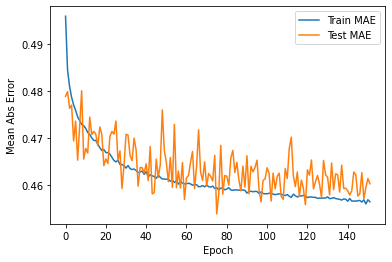

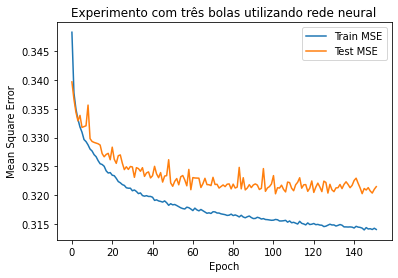

In [14]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'], label='Train MAE')
  plt.plot(hist['epoch'], hist['val_mae'], label='Test MAE')
  plt.legend()
  #plt.ylim([0,5])

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'], label='Train MSE')
  plt.plot(hist['epoch'], hist['val_mse'], label='Test MSE')
  plt.legend()
  plt.title("Experimento com três bolas utilizando rede neural")
  #plt.ylim([0,20])

plot_history(history)



In [13]:
""" 
esta célula contém a função simulacao, originalmente projetada para retornar o desempenho de uma jogada
de acordo com as distâncias das bolas e buracos. Utilizaremos-a aqui para rodar uma simulação
para uma certa entrada e sua respectiva predição (tacada) pelo modelo. Quando é retornado zero,
indica que houve encaçapamento.
"""

import math

voids = [.01+.01j,.01+.74j,.99+.01j,.99+.74j]
atrito = .998 #não é atrito de verdade, seria mais 1-coeficiente de atrito
dclosest = lambda pos: min([abs(pos-void) for void in voids])

from numpy import angle
def angulo(x):
 return angle(x)+6.28 if x.imag<0 else angle(x)

#Aqui vamos definir como a sinuca ficará após um instante que idealmente seria 0
class Ball:
 #Inicializar default como uma bola branca no centro
 def __init__(self, pos=.5+.375j, v=0, color=(255,255,255), void=0, ball=None):
  if ball:
   pos = ball.pos
   v = ball.v
   color = ball.color
   void = ball.void
  self.pos = pos
  self.v = v
  #A cor vai ser um tuple em RGB
  self.color = color
  #as bolas encaçapadas tem void = posição que foi encaçapada, do contrário, void = 0
  self.void = void

def simulacao(posicoes,tacada):
   score=0
   balls = []
   balls.append(Ball(pos=posicoes[0]))
   for pos in posicoes[1:]:
      balls.append(Ball(pos=pos,color=(255,0,0)))
   logCUSTOprod_start = np.sum([np.log(dclosest(ballx.pos)) if (ballx.color!=(255,255,255) and ballx.void==0) else 0 for ballx in balls])
   CUSTOProd_start = np.e**logCUSTOprod_start
   balls[0].v=tacada
   while (sum([abs(ball.v) for ball in balls]))>.0005:
    for ball in balls:
      #velocidade mínima
      if abs(ball.v)<.0001: continue
      nextpos = ball.pos+ball.v
      if nextpos.real < .01: #batida no lado esquerdo da sinuca
       ball.pos = .01+nextpos.imag*1j
       ball.v = -ball.v.real+ball.v.imag*1j #troca o componente x da velocidade
       continue
      if nextpos.imag < .01: #batida na parte de cima da sinuca
       ball.pos=nextpos.real+1j*.01
       ball.v = ball.v.real-ball.v.imag*1j #troca o componente y da velocidade
       continue
      if nextpos.real > .99: #batida no lado direito da sinuca
       ball.pos=.99+nextpos.imag*1j
       ball.v = -ball.v.real+ball.v.imag*1j #troca o componente x da velocidade
       continue
      if nextpos.imag > .74: #batida na parte de baixo da sinuca
       ball.pos=nextpos.real+1j*.74
       ball.v = ball.v.real-ball.v.imag*1j #troca o componente y da velocidade
       continue
      #aqui vou navegar por todas as bolas e ver se alguma encosta, ou seja, tem uma distância menor que a soma dos raios
      for secball in balls:
       if secball.color == ball.color: continue
       if secball.void: continue #ignora bolas encaçapadas
       #se tiver a distância menor que a soma dos raios, muda a velocidade das duas
       if abs(nextpos-secball.pos)<.02:
        #(ball.real - sec.real) < 0 and (ball.imag - sec.imag)<0 rot negativa
        #(ball.real - sec.real) > 0 and (ball.imag - sec.imag)>0 rot negativa
        rot = math.pi/2
        #a (x0i + y0j) + b (x1i +y1j) = (x2i + y2j)
        #variáveis conhecidas: x0,x1,x2,y0,y1,y2
        #a x0 + b x1 = x2
        #a y0 + b y1 = y2
        #a = (x2 * y1 - x1 * y2) / (x0 * y1 - x1 * y0)
        #b = (x0 * y2 - x2 * y0) / (x0 * y1 - x1 * y0)
        momento = ball.v# a resultante tem que ser igual a isso
        secball.v = (nextpos-secball.pos)/abs(nextpos-secball.pos)
        ball.v = (nextpos-secball.pos)/abs(nextpos-secball.pos)*(math.e**(1j*rot))
        #print(momento)
        #print(secball.v)
        #print(ball.v)
        if abs(angulo(ball.v)-angulo(momento))>math.pi/2:
         rot *= -1
        ball.v = (nextpos-secball.pos)/abs(nextpos-secball.pos)*(math.e**(1j*rot))        
        #a (ball.v.reali + ball.v.imagj) + b (secball.v.reali +secball.v.imagj) = (momento.reali + momento.imagj)
        #variáveis conhecidas: ball.v.real,secball.v.real,momento.real,ball.v.imag,secball.v.imag,momento.imag
        #a ball.v.real + b secball.v.real = momento.real
        #a ball.v.imag + b secball.v.imag = momento.imag
        a = (momento.real * secball.v.imag - secball.v.real * momento.imag) / (ball.v.real * secball.v.imag - secball.v.real * ball.v.imag)
        b = (ball.v.real * momento.imag - momento.real * ball.v.imag) / (ball.v.real * secball.v.imag - secball.v.real * ball.v.imag)
        ball.v*=a
        secball.v*=b
        #pygame.draw.line(screen, (255,255,255), ((ball.pos).real*sz[0],(ball.pos).imag*sz[0]), ((10000*secball.v+ball.pos).real*sz[0],(10000*ball.v+ball.pos).imag*sz[0]),3)
        #pygame.display.update()
       #enquanto elas não desencostarem, elas tem que se mexer
        while abs(nextpos-secball.pos)<.02:
         secball.pos += secball.v
         ball.pos += ball.v
         if ball.pos.real < .01: #batida no lado esquerdo da sinuca
          ball.pos = .01+nextpos.imag*1j
          ball.v = -ball.v.real+ball.v.imag*1j #troca o componente x da velocidade
         if ball.pos.imag < .01: #batida na parte de cima da sinuca
          ball.pos=nextpos.real+1j*.01
          ball.v = ball.v.real-ball.v.imag*1j #troca o componente y da velocidade
         if ball.pos.real > .99: #batida no lado direito da sinuca
          ball.pos=.99+nextpos.imag*1j
          ball.v = -ball.v.real+ball.v.imag*1j #troca o componente x da velocidade
         if ball.pos.imag > .74: #batida na parte de baixo da sinuca
          ball.pos=nextpos.real+1j*.74
          ball.v = ball.v.real-ball.v.imag*1j #troca o componente y da velocidade
        continue
      #Aqui só chega se não houver nenhuma colisão 
      #Para ver se a bola foi encaçapada, verificamos se a velocidade está abaixo do aceitável e se a distância do centro
      #da bola para um dos buracos está adequada
      for void in voids:
        if abs(nextpos - void)<.015 and abs(ball.v)<.005:
         if ball.color==(255,255,255): #se a bola for branca ela deve ser levada à sua posição inicial
          ball.void = 1
          ball.v = 0
         else:
          ball.v=0
          nextpos=void
          ball.void=void
          score=1
      ball.pos=nextpos
      ball.v*=atrito
   if score: CUSTOprod = 0; diffCUSTOprod = 0
   else:
    logCUSTOprod = np.sum([np.log(dclosest(ballx.pos)) if (ballx.color!=(255,255,255) and ballx.void==0) else 0 for ballx in balls])
    CUSTOProd = np.e**logCUSTOprod
    diffCUSTOprod = CUSTOProd/CUSTOProd_start
   return diffCUSTOprod